<a href="https://colab.research.google.com/github/mandudu/Machine-Learning-Projects/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

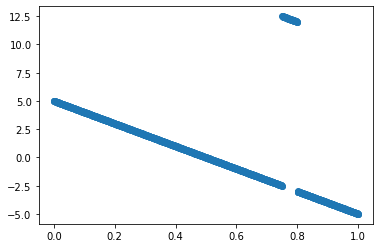

In [ ]:
x,y = generate_data()
plt.scatter(x,y)

The line generated from the output value has an unexpected spike at 0.75<x<0.8
which does not have a perfect linear relationship

# 2. Implement linear regression (2 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = m*x + b`, where `y` is the output, `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

In [ ]:
x = x.reshape([1000,1])
x.shape

(1000, 1)

In [ ]:
class LinearRegression:
        
    def fit(self, x, y, lr, iterations):
        #Initialization of weights, bias and cost list
        self.bias = np.zeros(1)
        self.weights = np.ones(1)
        self.costs = []

        for i in range(iterations):

            #Linear Regression Function
            y_hat = x @ self.weights + self.bias

            #Error value
            error = y - y_hat

            #Mean Squared Error
            mse = np.mean(np.sum(np.square(error)))
            self.costs.append(mse) #append MSE to cost list for the graph

            #Partial derivative of weights and bias
            gradient_weights = - (1 / 1000) * np.sum(x.T @ error)
            gradient_bias = - (1 / 1000) * np.sum(error)            

            #Gradient Descent
            self.weights = self.weights - lr * gradient_weights
            self.bias = self.bias - lr * gradient_bias
    
    def predict(self, x):
        return (x @ self.weights) + self.bias

In [ ]:
#Instantiate
model = LinearRegression()
#fit the model with 0.5 Learning rate and 10000 epochs
model.fit(x,y, 0.05, 10000)

#Predictions
predictions = model.predict(x)
#Print hyperparameters
model.weights, model.bias


(array([-7.52747253]), array([4.51373626]))

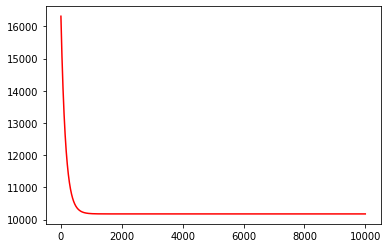

In [ ]:
#epoch vs cost graph 
plt.plot(list(range(10000)),model.costs, '-r')


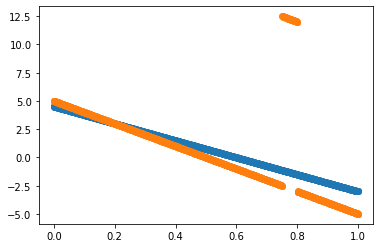

In [ ]:
#Predictions vs Groud Truth
plt.scatter(x,predictions)
plt.scatter(x,y)

Both the bias and the weights of the linear regression model has a big difference with the actual values. Therefore, the fit of the model is not robust/accurate when using MSE.

# 4. "Robust" linear regression (0.5 points)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

In [ ]:
x = x.reshape([1000,1])
x.shape

(1000, 1)

In [ ]:
class LinearRegression_robust:
        
    def fit(self, x, y, lr, iterations):
        #Initialization of weights, bias and cost list
        self.bias = np.zeros(1)
        self.weights = np.ones(1)
        self.costs = []

        for i in range(iterations):
            
            #Linear Regression Function
            y_hat = np.dot(x, self.weights) + self.bias

            #Error value
            error = y - y_hat

            #Mean Absolute Error
            mae = np.mean(np.sum(np.abs(error)))
            self.costs.append(mae) #append MAE to cost list for the graph

            #Partial derivative of weights and bias
            gradient_weights = -(1/1000) * np.sum(np.dot(x.T, error/np.abs(error)))
            gradient_bias = -(1/1000) * np.sum(error/np.abs(error))  

            #Gradient Descent
            self.weights = self.weights - lr * gradient_weights
            self.bias = self.bias - lr * gradient_bias
    
    def predict(self, x):
        return (x @ self.weights) + self.bias


In [ ]:
#Instantiate
model_robust = LinearRegression_robust()
#Fit the model with 0.05 learning rate and 10000 epochs
model_robust.fit(x,y, 0.05, 10000)


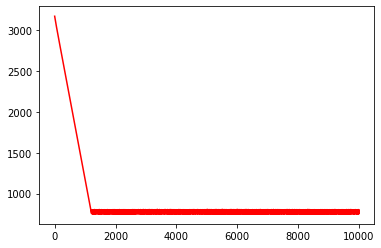

In [ ]:
plt.plot(list(range(10000)),model_robust.costs, '-r')


The trajectory of the MAE graph descends in a linear line before it converges whereas MSE descends exponentially before it converges.

# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?

In [ ]:
#Predicting the values
predictions_robust = model_robust.predict(x)

#Hyperparameters
model_robust.weights, model_robust.bias

(array([-10.00658659]), array([4.9825]))

Both Weight and Bias values are almost identical to the true values used in generate_data.

<function matplotlib.pyplot.show(*args, **kw)>

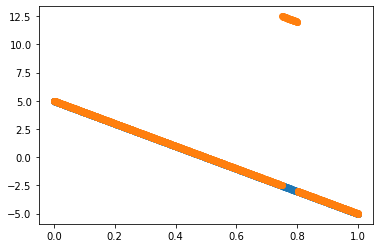

In [ ]:
#predictions vs ground truth
plt.scatter(x,predictions_robust)
plt.scatter(x,y)
plt.show

MAE performs better in this dataset because Mean Squared Error punishes larger errors to a greater extent than the Mean Absolute Error. Furthermore, since the data that we created has an extremely large error points from 0.75 < x < 0.8, it is best not to use MSE since MSE focuses on reducing large outliers errors. Whereas, MAE focuses on greater interpretability. 